## Libraries & Data


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame({
   'x': range(1,11),
   'y1': np.random.randn(10),
   'y2': np.random.randn(10)+range(1,11),
   'y3': np.random.randn(10)+range(11,21),
   'y4': np.random.randn(10)+range(6,16),
   'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6),
   'y6': np.random.randn(10)+range(2,12),
   'y7': np.random.randn(10)+range(5,15),
   'y8': np.random.randn(10)+range(4,14),
   'y9': np.random.randn(10)+range(4,14) 
})
df.head()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,1,0.315213,1.607343,10.204426,5.626565,2.452983,-0.439478,5.826952,5.516863,3.586473
1,2,-1.150170,2.028580,12.018295,6.687247,6.605140,2.834075,6.673720,5.040039,6.325240
2,3,0.204389,3.086496,12.635450,7.521337,4.121583,3.333696,7.080958,6.681483,5.167516
3,4,0.903328,2.362935,13.430945,8.557850,6.946687,4.930041,6.089858,7.518744,7.458009
4,5,-1.477483,4.961415,13.959016,9.713429,7.593393,6.234028,9.326802,7.986108,8.271259


## Spaghetti Chart

Several ways exist to avoid creating a [spaghetti plot](https://www.data-to-viz.com/caveat/spaghetti.html), and one of them is using small multiple: here we cut the window in several **subplots**, one per group.

Then, you can choose to display every group discretely, or not to show them at all. Note that you can easily do the same with the [area chart](/242-area-chart-and-faceting).


## Left graph


You can create multiple plots on the same figure by using the `subplot()` function of matplotlib.

Note that you can check [this post](https://python-graph-gallery.com/194-split-the-graphic-window-with-subplot/) to see more examples of the `subplot()` function.


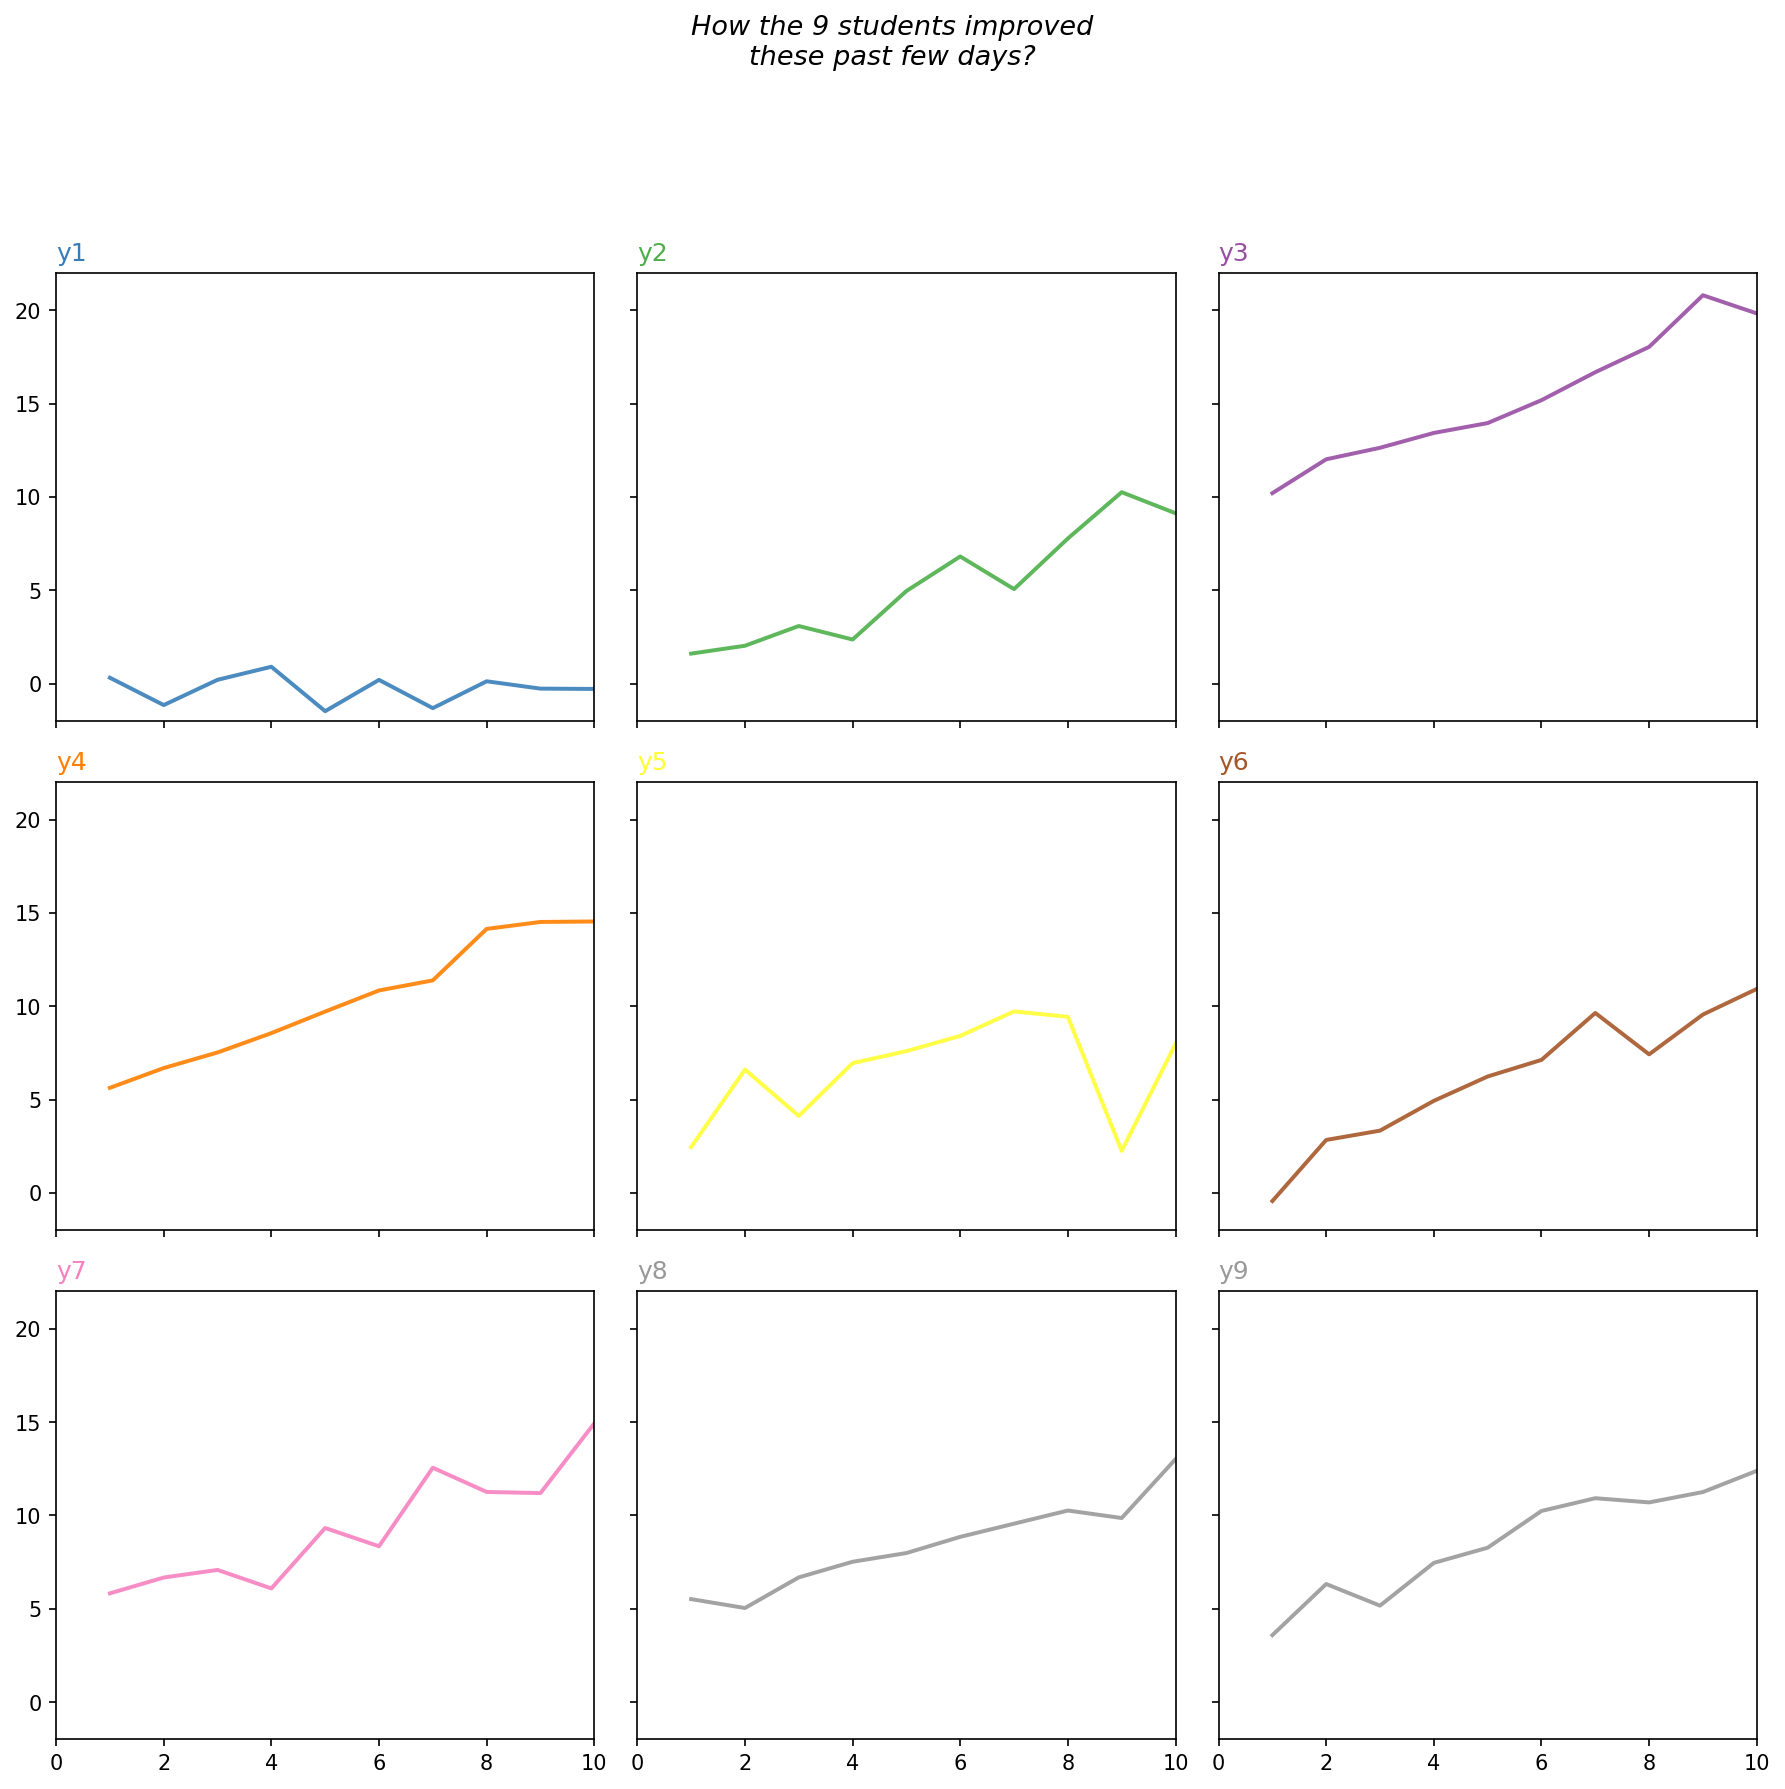

In [9]:
# Create a color palette
palette = plt.get_cmap('Set1')

# Create a figure and axes
fig, axes = plt.subplots(3, 3, figsize=(12, 12), dpi=150)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Multiple line plots
for num, column in enumerate(df.drop('x', axis=1), start=1):
    ax = axes[num-1]
    
    # Plot the line plot
    ax.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    
    # Same limits for every chart
    ax.set_xlim(0, 10)
    ax.set_ylim(-2, 22)
    
    # Not ticks everywhere
    if num in range(7):
        ax.tick_params(labelbottom=False)
    if num not in [1, 4, 7]:
        ax.tick_params(labelleft=False)
    
    # Add title
    ax.set_title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

# General title
fig.suptitle(
    "How the 9 students improved\nthese past few days?",
    fontsize=13,
    fontweight=0,
    color='black',
    style='italic',
    y=1.02
)

# Adjust layout
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the graph
plt.show()


## Right graph


As an alternative to the previous example, you can make multiple subplots consisting the lines of all groups with only one group highlighted in each subplot.


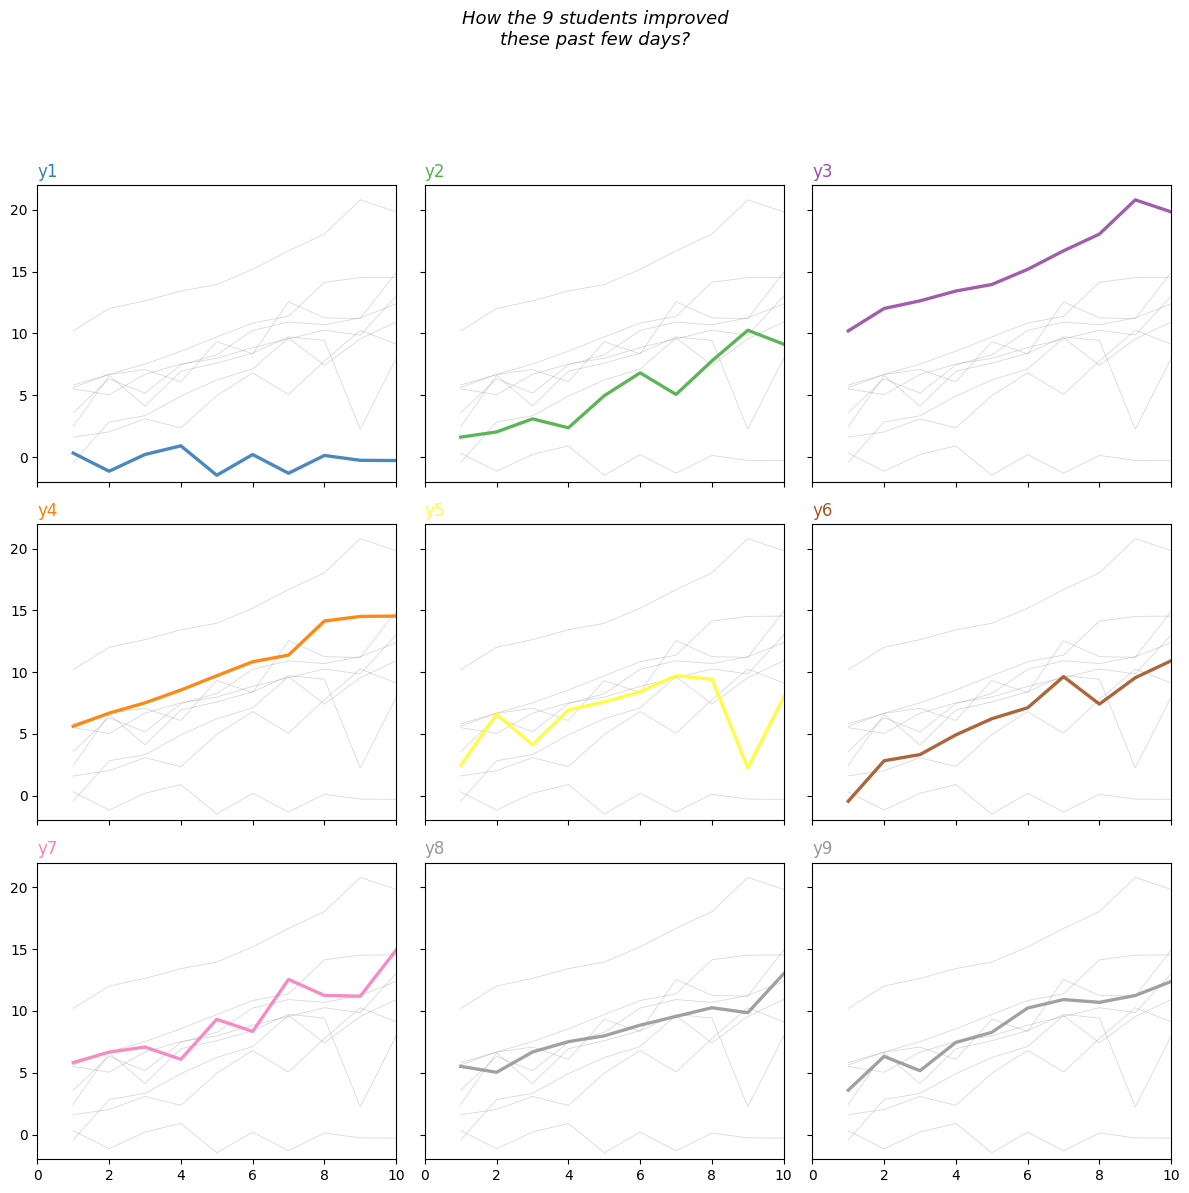

In [11]:
# Create a color palette
palette = plt.get_cmap('Set1')

# Create a figure and axes
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Multiple line plots
for num, column in enumerate(df.drop('x', axis=1), start=1):
    ax = axes[num-1]
    
    # Plot every group, but discrete (lower alpha)
    for v in df.drop('x', axis=1):
        ax.plot(df['x'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    
    # Plot the line plot
    ax.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    
    # Same limits for every chart
    ax.set_xlim(0, 10)
    ax.set_ylim(-2, 22)
    
    # Not ticks everywhere
    if num in range(7):
        ax.tick_params(labelbottom=False)
    if num not in [1, 4, 7]:
        ax.tick_params(labelleft=False)
    
    # Add title
    ax.set_title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

# General title
fig.suptitle(
    "How the 9 students improved\nthese past few days?",
    fontsize=13,
    fontweight=0,
    color='black',
    style='italic',
    y=1.02
)

# Adjust layout
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the graph
plt.show()


## Going further

You might be interested in:

- this [advanced small multiples](/web-small-multiple-with-highlights) example
- how to stack the lines on top of each other with the [area chart](/stacked-area-plot)
